 Q1.Generate 1 M uniform variate. Use transformation method $\displaystyle{ y=-\frac{log(x)}{\beta}} .$ 
 
 Generate the histogram. 
    Fit the histogram with $\displaystyle{𝑓(𝑦, 𝐴, 𝜆) = 𝐴 \exp(−𝜆𝑦)}$. Compare the values of 𝛽 and 𝜆.

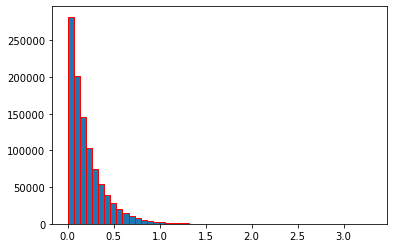

[3.32420970e+05 5.00534429e+00]


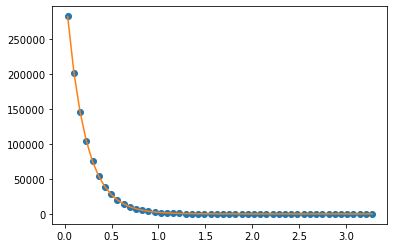

(50, 50)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from scipy.optimize import curve_fit
def f(x,A,l):
    y=A*np.exp(-(l*x))
    return (y)
x= np.random.random(10**6)
beta=5
z=-(np.log(x)/beta)
z
c,b,p=plt.hist(z,50,ec='red')
plt.show()
bcenter=(b[:-1]+b[1:])/2
plt.plot(bcenter,c, 'o')

p,s=curve_fit(f,bcenter,c)
print(p)
plt.plot(bcenter, f(bcenter, *p))
plt.show()

bcenter.size, c.size

Q2.Generate 1 M Gaussian variate by averaging over 𝑁 trials.

Fit the histogram of the gaussian random numbers thus created by $\displaystyle{ 𝑓(𝑦, 𝐴, 𝜇, 𝜎) = 𝐴 \exp(−\frac{(𝑦−𝜇)^2}{\sigma^2})}$ 

Study the variation of 𝜎 with N.


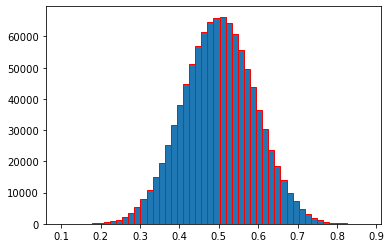

mu= 0.5001093379359738 sigma= -0.09278502225821633
[ 6.66800534e+04  5.00109338e-01 -9.27850223e-02]


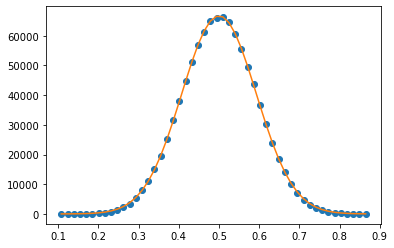

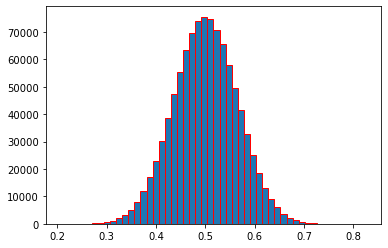

mu= 0.49994969580668586 sigma= 0.06515799788999983
[7.56426374e+04 4.99949696e-01 6.51579979e-02]


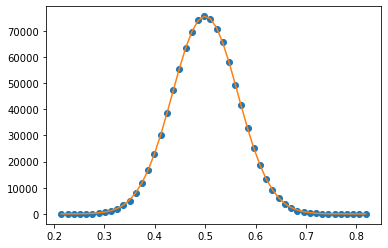

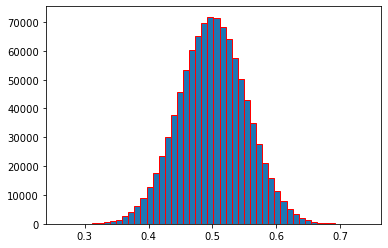

mu= -361.49770414114425 sigma= 1939.7827705038385
[20351.04930649  -361.49770414  1939.7827705 ]


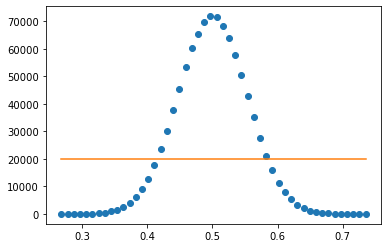

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from scipy.optimize import curve_fit

def f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

N=[10,20,30]
for i in N:
    R= np.random.rand(i,10**6)
    B=np.mean(R,0)
    B
    c,b,p=plt.hist(B,50,ec='red')
    #print('count',c,'\n\n binborder',b)
    plt.show()
    bcenter=(b[:-1]+b[1:])/2
    plt.plot(bcenter,c, 'o')

    p,s=curve_fit(f,bcenter,c,maxfev=10000)
    A,mu,sig=p
    print('mu=',mu ,'sigma=',sig )
    print(p)
    plt.plot(bcenter, f(bcenter, *p))
    plt.show()

Q3.Use a gaussian random number with a user specified value of 𝜇 and 𝜎. Check the 𝜇 and 𝜎 obtained by your algorithm. Use 𝑁 = 20

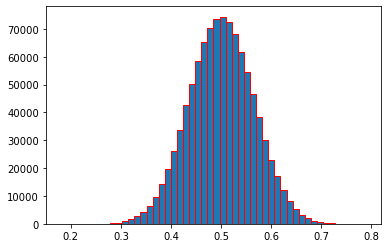

mu= 0.5000144228329935 sigma= -0.06527306033652092
[ 7.44202375e+04  5.00014423e-01 -6.52730603e-02]


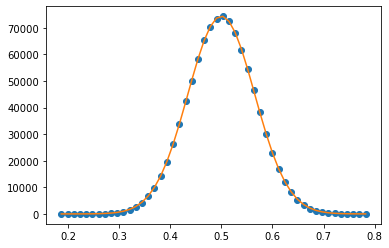

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from scipy.optimize import curve_fit
N=20
def f(x,A,mu,sig):
    y=A*np.exp(-(x-mu)**2/(2*sig**2))
    return(y)
    
R= np.random.rand(N,10**6)
#x
B=np.mean(R,0)
B
c,b,p=plt.hist(B,50,ec='red')
#print('count',c,'\n\n binborder',b)
plt.show()
bcenter=(b[:-1]+b[1:])/2
plt.plot(bcenter,c, 'o')

p,s=curve_fit(f,bcenter,c,maxfev=10000)
A,mu,sig=p
print('mu=',mu ,'sigma=',sig )
print(p)
plt.plot(bcenter, f(bcenter, *p))
plt.show()


| binborder 	|	 count 	|
|-------------------------------|
| -3.29629645 	|	 1 	|
|-------------------------------|
| -3.18247410 	|	 1 	|
|-------------------------------|
| -3.06865175 	|	 2 	|
|-------------------------------|
| -2.95482941 	|	 1 	|
|-------------------------------|
| -2.84100706 	|	 15 	|
|-------------------------------|
| -2.72718471 	|	 26 	|
|-------------------------------|
| -2.61336236 	|	 55 	|
|-------------------------------|
| -2.49954001 	|	 105 	|
|-------------------------------|
| -2.38571766 	|	 251 	|
|-------------------------------|
| -2.27189531 	|	 431 	|
|-------------------------------|
| -2.15807296 	|	 904 	|
|-------------------------------|
| -2.04425061 	|	 1560 	|
|-------------------------------|
| -1.93042826 	|	 2672 	|
|-------------------------------|
| -1.81660592 	|	 4135 	|
|-------------------------------|
| -1.70278357 	|	 6558 	|
|-------------------------------|
| -1.58896122 	|	 9769 	|
|-------------------------------|
| -

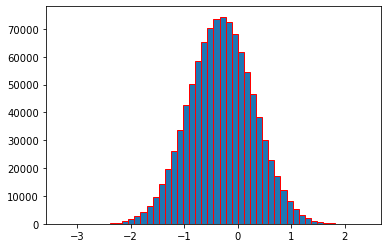

given mu= 0.7 given sigma= 0.07
mu= -0.30749311133726687 sigma= 0.6114825274093201


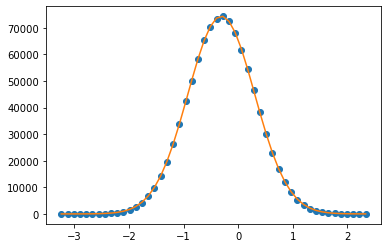

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from scipy.optimize import curve_fit
N=20
new_mu=0.7
new_sig=.07
B=B*(new_sig/sig)+(new_mu-mu*(new_sig/sig))
def f(x,A,mu,sig):
    y=A*np.exp(-(x-mu)**2/(2*sig**2))
    return(y)
    
#x= np.random.rand(N,10**6)
#A1=7
#mu1=4
#sig1=6
#z=A1*np.exp(-(x-mu1)**2/(2*sig1**2))
#B=np.mean(R,0)
#B
c,b,p=plt.hist(B,50,ec='red')
print('|','binborder','\t|\t','count \t|')
for i in range(len(c)):
    print('|-------------------------------|')
    print('| %.8f'%b[i],'\t|\t %.f'%c[i],'\t|')
print('|_______________________________|')
plt.show()
bcenter=(b[:-1]+b[1:])/2
#plt.plot(bcenter,c, 'o')

p1,s1=curve_fit(f,bcenter,c,maxfev=10000)
A1,mu1,sig1=p1
print('given mu=',new_mu,'given sigma=',new_sig)
print('mu=',mu1 ,'sigma=',sig1 )

plt.plot(bcenter,c, 'o',bcenter, f(bcenter, *p1))
plt.show()
